<a href="https://colab.research.google.com/github/sandhya842/week1-AI-/blob/main/sandhya_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1: Regression Task (California Housing) 3.1 Task 1: Load and Split Dataset • Use the California Housing dataset from sklearn.datasets. • Split the dataset into training (80%) and test (20%) sets.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("/content/sample_data/california_housing_train.csv")


X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Test target shape:", y_test.shape)


Training features shape: (13600, 8)
Test features shape: (3400, 8)
Training target shape: (13600,)
Test target shape: (3400,)


3.2 Task 2: Complete all the Task • Regression Task (California Housing): – Step 1: Baseline Model (No Regularization) Build a Linear Regression model without any regularization. ∗ Train the model on the training set. ∗ Observe the coefficients of the model. ∗ Compute the Mean Squared Error (MSE) on both training and test sets. ∗ This step helps to understand how a simple linear model behaves on the dataset and serves as a baseline for comparison.

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

print("Model Coefficients:")
for feature, coef in zip(X_train.columns, baseline_model.coef_):
    print(f"{feature}: {coef:.4f}")

y_train_pred = baseline_model.predict(X_train)
y_test_pred = baseline_model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"\nMean Squared Error (Training Set): {mse_train:.4f}")
print(f"Mean Squared Error (Test Set): {mse_test:.4f}")


Model Coefficients:
longitude: -43465.2477
latitude: -43106.3044
housing_median_age: 1131.7244
total_rooms: -8.8433
total_bedrooms: 113.7080
population: -35.6571
households: 45.1476
median_income: 40194.7263

Mean Squared Error (Training Set): 4875656612.3278
Mean Squared Error (Test Set): 4634658406.2233


Step 2: Hyperparameter Tuning Use GridSearchCV or RandomizedSearchCV to tune hyperparameters for Ridge and Lasso regression models. ∗ Define a grid of alpha values (regularization strength). ∗ Run cross-validation on the training set to find the optimal alpha. ∗ Evaluate the model performance on the test set using MSE. ∗ This step demonstrates the importance of selecting appropriate hyperparameters to improve generalization.

In [3]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

alpha_values = np.logspace(-3, 3, 10)

ridge = Ridge()
ridge_grid = {'alpha': alpha_values}
ridge_search = GridSearchCV(ridge, ridge_grid, cv=5, scoring='neg_mean_squared_error')
ridge_search.fit(X_train, y_train)

best_ridge = ridge_search.best_estimator_
y_test_ridge = best_ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_test_ridge)

print("Ridge Regression")
print("Best alpha:", ridge_search.best_params_['alpha'])
print("Test MSE:", mse_ridge)

lasso = Lasso(max_iter=10000)
lasso_grid = {'alpha': alpha_values}
lasso_search = GridSearchCV(lasso, lasso_grid, cv=5, scoring='neg_mean_squared_error')
lasso_search.fit(X_train, y_train)

best_lasso = lasso_search.best_estimator_
y_test_lasso = best_lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_test_lasso)

print("\nLasso Regression")
print("Best alpha:", lasso_search.best_params_['alpha'])
print("Test MSE:", mse_lasso)

Ridge Regression
Best alpha: 10.0
Test MSE: 4634597634.731547

Lasso Regression
Best alpha: 10.0
Test MSE: 4634642272.384492


 Step 3: Regularization Experiments (L1 vs L2) Train L1 (Lasso) and L2 (Ridge) regres- sion models using the optimal hyperparameters.

∗ Compare the coefficients learned by both models. Notice that L1 tends to produce sparse coefficients (some set to zero), while L2 shrinks coefficients without zeroing them. ∗ Evaluate and compare the MSE on training and test sets. ∗ Discuss the effect of regularization on the bias-variance tradeoff: · How L1/L2 reduces variance and prevents overfitting. · How excessive regularization may increase bias and underfit the data. ∗ Visualize the effect by plotting coefficients or training/test error versus alpha values (optional but recommended).

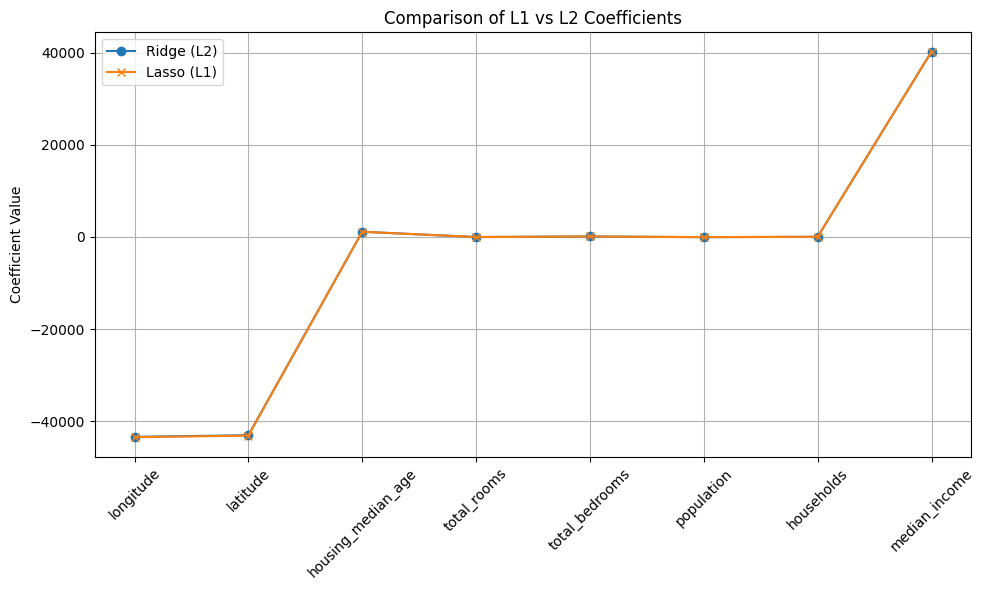

Ridge Regression MSE - Training: 4875663907.562645 Test: 4634597634.731547
Lasso Regression MSE - Training: 4875657321.411561 Test: 4634642272.384492


In [4]:
import matplotlib.pyplot as plt

ridge_final = Ridge(alpha=ridge_search.best_params_['alpha'])
ridge_final.fit(X_train, y_train)
y_train_ridge = ridge_final.predict(X_train)
y_test_ridge = ridge_final.predict(X_test)
mse_train_ridge = mean_squared_error(y_train, y_train_ridge)
mse_test_ridge = mean_squared_error(y_test, y_test_ridge)

lasso_final = Lasso(alpha=lasso_search.best_params_['alpha'], max_iter=10000)
lasso_final.fit(X_train, y_train)
y_train_lasso = lasso_final.predict(X_train)
y_test_lasso = lasso_final.predict(X_test)
mse_train_lasso = mean_squared_error(y_train, y_train_lasso)
mse_test_lasso = mean_squared_error(y_test, y_test_lasso)

plt.figure(figsize=(10,6))
plt.plot(ridge_final.coef_, marker='o', label='Ridge (L2)')
plt.plot(lasso_final.coef_, marker='x', label='Lasso (L1)')
plt.xticks(range(len(X_train.columns)), X_train.columns, rotation=45)
plt.ylabel("Coefficient Value")
plt.title("Comparison of L1 vs L2 Coefficients")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Ridge Regression MSE - Training:", mse_train_ridge, "Test:", mse_test_ridge)
print("Lasso Regression MSE - Training:", mse_train_lasso, "Test:", mse_test_lasso)


4 Part 2: Classification Task (Breast Cancer) 4.1 Task 1: Load and Split Dataset • Use the Breast Cancer dataset from sklearn.datasets. • Treat it as a binary classification task. • Split into training (80%) and test (20%) sets.

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Test target shape:", y_test.shape)


Training features shape: (455, 30)
Test features shape: (114, 30)
Training target shape: (455,)
Test target shape: (114,)


 Step 2: Hyperparameter Tuning Use GridSearchCV or RandomizedSearchCV to tune hyperparameters for logistic regression models with regularization. ∗ Focus on tuning the C parameter (inverse of regularization strength) and the penalty type (l1 or l2). ∗ Run cross-validation on the training set to identify the optimal hyperparameters. ∗ Evaluate the model performance on the test set using accuracy.

∗ This step demonstrates the importance of hyperparameter selection for improving model gen- eralization.

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

logreg = LogisticRegression(max_iter=5000)
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Best hyperparameters:", grid_search.best_params_)
print("Test Accuracy:", test_accuracy)


Best hyperparameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Test Accuracy: 0.9824561403508771


 Step 3: Regularization Experiments (L1 vs L2) Train separate logistic regression models using L1 (Lasso-like) and L2 (Ridge-like) regularization with the optimal hyperparameters. ∗ Compare the coefficients for L1 and L2. Observe that L1 tends to produce sparse coefficients (some exactly zero), whereas L2 shrinks all coefficients but rarely sets them exactly to zero. ∗ Evaluate and compare accuracy on training and test sets. ∗ Discuss the effect of regularization on the bias-variance tradeoff: · How L1/L2 reduces variance and mitigates overfitting. · How overly strong regularization may increase bias, reducing accuracy. ∗ Optional: Visualize the coefficients or plot accuracy vs C values to better understand the impact of L1 and L2 regularization.



In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


l1_model = LogisticRegression(penalty='l1', C=grid_search.best_params_['C'], solver='liblinear', max_iter=5000)
l1_model.fit(X_train, y_train)
y_train_l1 = l1_model.predict(X_train)
y_test_l1 = l1_model.predict(X_test)
train_acc_l1 = accuracy_score(y_train, y_train_l1)
test_acc_l1 = accuracy_score(y_test, y_test_l1)


l2_model = LogisticRegression(penalty='l2', C=grid_search.best_params_['C'], solver='liblinear', max_iter=5000)
l2_model.fit(X_train, y_train)
y_train_l2 = l2_model.predict(X_train)
y_test_l2 = l2_model.predict(X_test)
train_acc_l2 = accuracy_score(y_train, y_train_l2)
test_acc_l2 = accuracy_score(y_test, y_test_l2)


print("L1 Regularization - Training Accuracy:", train_acc_l1, "Test Accuracy:", test_acc_l1)
print("L2 Regularization - Training Accuracy:", train_acc_l2, "Test Accuracy:", test_acc_l2)

print("\nL1 Coefficients:", l1_model.coef_)
print("L2 Coefficients:", l2_model.coef_)


L1 Regularization - Training Accuracy: 0.989010989010989 Test Accuracy: 0.9824561403508771
L2 Regularization - Training Accuracy: 0.9692307692307692 Test Accuracy: 0.956140350877193

L1 Coefficients: [[ 7.30958660e-01 -1.07460162e-01  9.34807185e-02 -1.79876748e-03
   0.00000000e+00  4.75090371e+01 -1.19007680e+01 -1.36039982e+02
   1.98751069e+01  0.00000000e+00  0.00000000e+00  1.72521284e+00
   0.00000000e+00 -1.97640208e-01  0.00000000e+00  0.00000000e+00
   4.99460265e+01  0.00000000e+00  1.85116974e+01  0.00000000e+00
   1.80956534e-01 -4.38758677e-01  5.73778436e-02 -2.07547510e-02
  -2.17664843e+01  7.97958103e+00 -1.46498275e+01 -2.51943474e+01
  -2.53385669e+01  0.00000000e+00]]
L2 Coefficients: [[ 5.40272741  0.26573732 -0.52651203 -0.02095479 -2.29922151 -0.2169419
  -3.56980218 -5.0110607  -2.26418385  0.36762747 -0.58036525  3.84169255
  -0.63875637 -0.10714305 -0.40591246  3.57237002  4.36577514 -0.26636925
   0.39354765  0.62630698 -0.20718582 -0.68999884  0.17661962 -0